<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
# CAR SALES Exploratory Data Analysis 

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [How many Different Car Body Types are Sold ?](#section401)<br/>
    - 4.2 [How many Different Car Brands Sold ?](#section402)<br/>
    - 4.3 [How many Different Engine Type Cars Sold ?](#section403)<br/>
    - 4.4 [Different Car Models Sold](#section404)<br/>
    - 4.5 [Car Price Analysis](#section405)<br/>
    - 4.6 [Year wise sales Analysis](#section406)<br/>
    - 4.7 [Engine Type and Mielage realationships](#section407)<br/>
    - 4.8 [Car Price varying factors](#section408)<br/>
    - 4.9 [Car sales depending factors](#section409)<br/>
    - 4.10[Establish coorelation between all the features using heatmap.](#section410)<br/>
    - 4.11[Hypothesis: Over the period car sales has increased](#section411)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


<a id=section2></a>

### 2. Data Loading and Description


<a id=section201></a>

- The dataset consists of the information about fastfood restarants in US. Various variables present in the dataset includes data of name,address, city, country, logitutude, latitude and website etc. 
- The dataset comprises of __10000 observations of 10 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Car           | Name of the Car                                           | 
| Price         | Price of the car                                          |  
| Body          | Body of the car                                           |    
| Mileage       | Mileage of the car                                        |   
| engV          |                                                           |
| engType       | Engine type of the car                                    |
| Registration  | Latitude of the restarant location                        | 
| Year          | Year                                                      |
| Model         | Model Number of the car                                   |
| Drive         | Describes the Type of the Drive                           |


#### Some Background Information


#### Importing packages                                          

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
                                 # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics

sns.set()

from subprocess import check_output
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt   
%matplotlib inline




#### Importing the Dataset

In [2]:
carsales_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv",encoding='iso-8859-1')     # Importing training dataset using pd.read_csv
carsales_data

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.000,crossover,68,2.50,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.000,sedan,173,1.80,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.000,other,135,5.50,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.000,van,162,1.80,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.000,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.000,crossover,83,2.00,Petrol,yes,2013,X-Trail,full
6,Honda,6500.000,sedan,199,2.00,Petrol,yes,2003,Accord,front
7,Renault,10500.000,vagon,185,1.50,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.000,sedan,146,1.80,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.000,sedan,125,2.20,Diesel,yes,2010,E-Class,rear


<a id=section3></a>

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [3]:
carsales_data.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(9576, 10)

carsales_data has __9576 rows__ and __10 columns.__

In [4]:
carsales_data.columns                                            # This will print the names of all columns.

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [5]:
carsales_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


<a id=section301></a>

In [6]:
carsales_data.tail()                                                   # This will print the last n rows of the Data Frame

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [7]:
carsales_data.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [8]:
carsales_data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

From the above output we can see that __engV and drive column contains __maximum null values__. We will see how to deal with them.

In [9]:
carsales_data.groupby(['car','mileage', 'body' ,'price'])['year'].count()

car           mileage  body       price    
Acura         4        sedan      38200.00     1
              30       crossover  46999.00     1
              32       crossover  30999.00     1
              82       crossover  17200.00     1
              85       crossover  18500.00     1
              126      sedan      12900.00     1
              144      sedan      8699.00      1
              145      sedan      8550.00      1
                                  8699.00      1
                                  8700.00      1
              150      sedan      15000.00     1
              170      crossover  15650.00     1
              199      crossover  11111.00     1
Alfa Romeo    60       hatch      15999.00     1
              62       sedan      15300.00     1
              91       sedan      12100.00     1
              94       sedan      2300.00      1
              122      sedan      2300.00      1
              150      sedan      12000.00     1
              156      se

This data consolidation after gruopuing the data based on car, mileage ,body price based on year.

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [10]:
profile = pandas_profiling.ProfileReport(carsales_data)
profile.to_file(outputfile="carsales_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __carsales_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a>

### 3.3 Preprocessing

- Dealing with missing values<br/>


In [11]:
carsales_data.drive =carsales_data.drive.fillna(carsales_data['drive'].mode()[0])

To deal with mising values we are replcing the drive column missing values with mode which is "full".

In [12]:
median_engV = carsales_data.engV.median()
carsales_data.engV.fillna(median_engV,inplace=True)


Replaced the engV column value with median of engV column to fill the missing Values.

In [13]:
median_engType = carsales_data['engType'].unique()
median_engType

array(['Gas', 'Petrol', 'Diesel', 'Other'], dtype=object)

In [14]:
carsales_data.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

Missing values have been replaced.

## 3.4 Post Pandas Profiling

In [15]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(carsales_data)
profile.to_file(outputfile="carsales_after_preprocessing.html")

Now we have preprocessed the data, now the dataset doesnot contain missing values. The pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e carsales_after_preprocessing.html and carsales_before_preprocessing.html.
In carsales_after_preprocessing.html report, observations:

    In the Dataset info, Total Missing(%) = 0.0% 
    

### 4. Questions

### 4.1 How many Different Car Body Types are Sold ?

   - Using Countplot

Text(0.5,1,'Count plot for Different bodt type of Cars sold')

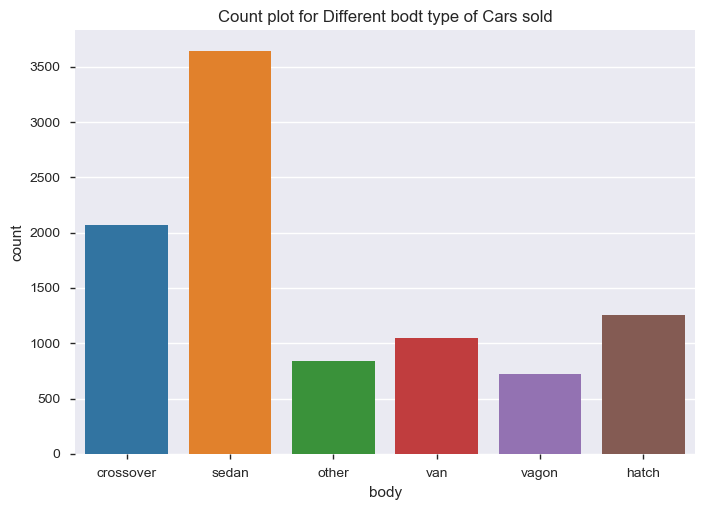

In [16]:
sns.countplot(x='body',data=carsales_data).set_title('Count plot for Different body type of Cars sold')


You can see that highest number of cars sold are Sedan. To know the exact count:

    -Using groupby Body (Car Type)

In [17]:
carsales_data.groupby(['body'])['body'].count()

body
crossover    2069
hatch        1252
other         838
sedan        3646
vagon         722
van          1049
Name: body, dtype: int64

3646 Seadan cars are in the dataset. Is equivalent to 36 % of the cars sold

### 4.2 How many Different Car Brands Sold ?

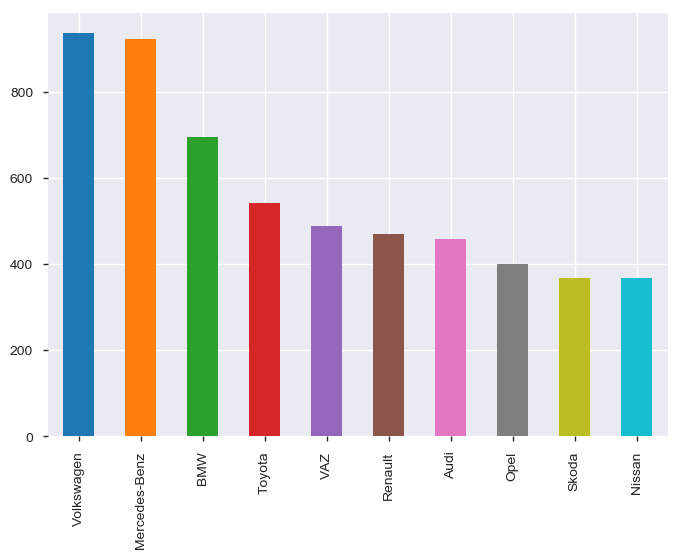

In [18]:
carsales_data['car'].value_counts().head(10).plot.bar()

This plot helps us in understing different car names and their occurances within the car sales data set . Voikaswagan Cars apears to be sold higly.

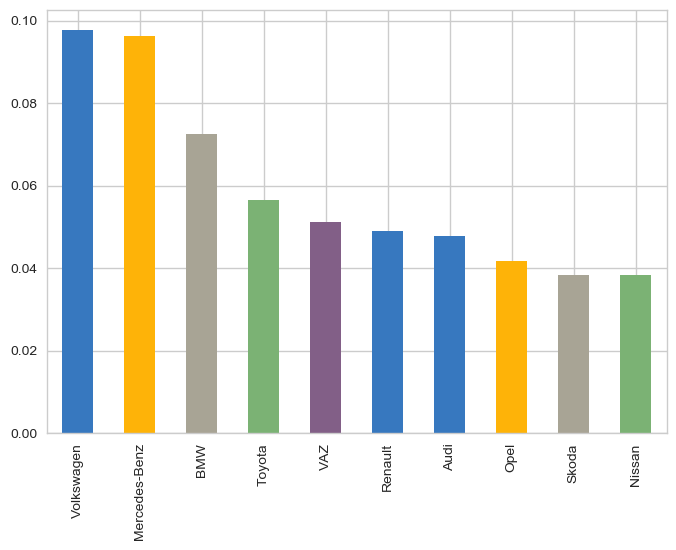

In [47]:
(carsales_data['car'].value_counts().head(10)/len(carsales_data)).plot.bar()

This plot helps to understand the probability of the car Brands in the data set that are sold

### 4.3 How many Different Engine Type Cars Sold ?

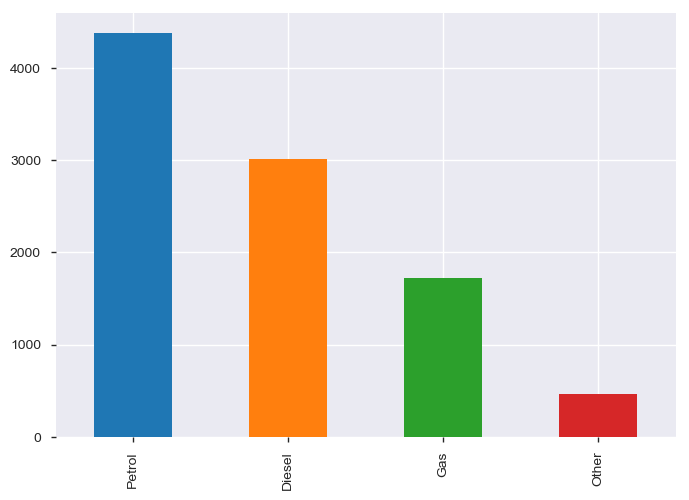

In [20]:
carsales_data['engType'].value_counts().head(10).plot.bar()

Above plot hepls us to understad the occurances of diffrent car engine types that are avilable in data set.

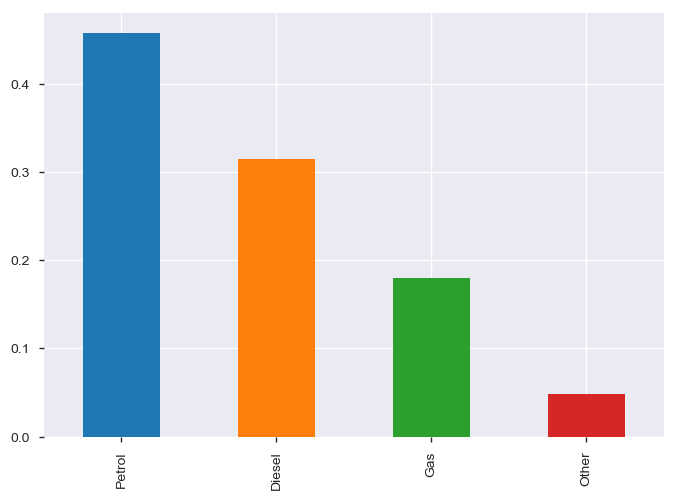

In [21]:
(carsales_data['engType'].value_counts().head(10)/len(carsales_data)).plot.bar()

This plot tells about probability of car engine types and their occurances in data set.

    -Using group by to know the numbers

In [22]:
carsales_data.groupby(['engType'])['engType'].count()

engType
Diesel    3013
Gas       1722
Other      462
Petrol    4379
Name: engType, dtype: int64

Pertrol cars sold in high columes. In toltal car sales 43% are Petrol engine type cars.

### 4.4 Different Car Models Sold

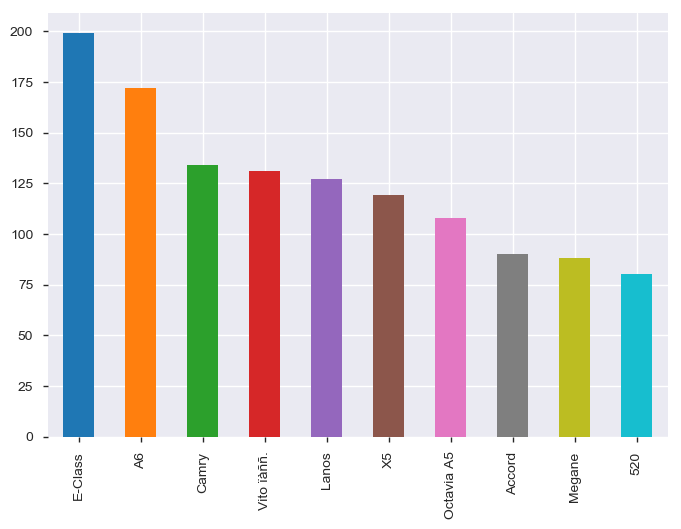

In [23]:
carsales_data['model'].value_counts().head(10).plot.bar()

This plot helps us in understanding the different models of cars and their occurances. Most of the car model belongs to E-Class.

 -Using group by to know the numbers

In [24]:
carsales_data.groupby(['model'])['model'].count()

model
1 Series            1
1.3                 1
10                  1
100                18
106                 1
107                11
11                  1
1102 Òàâðèÿ        22
1103 Ñëàâóòà       29
110557              9
1117                2
1118               11
1119                9
116                 3
118                 5
120                 1
125                 1
1301                1
1302                1
147                 1
156                 2
159                 4
19                  2
190                 8
2                   3
200                 7
2008                4
205                 1
206                10
207                11
                   ..
X6                 41
X6 M                5
XC60                4
XC70                4
XC90                5
XE                  2
XF                  9
XJR-S               1
XKR                 1
XV                  1
Xantia              1
Xedos 6             4
Xedos 9             2
Xenon               1
Xsar

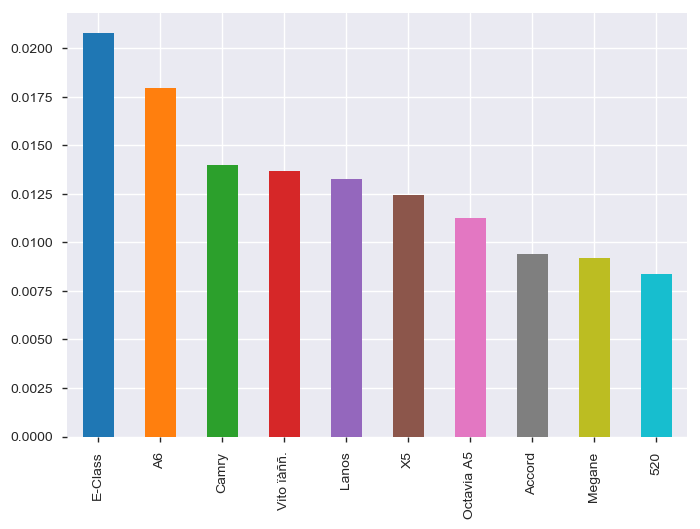

In [25]:
(carsales_data['model'].value_counts().head(10)/len(carsales_data)).plot.bar()

This plots gives the probabilty of car being specific model from the car sales data set.

### 4.5 Car Price Analysis

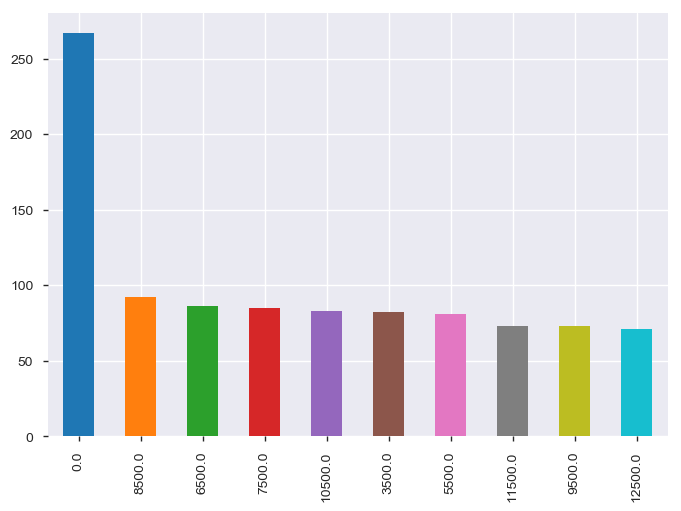

In [26]:
carsales_data['price'].value_counts().head(10).plot.bar()

This plots gives the understaing of car prices and their occurances.

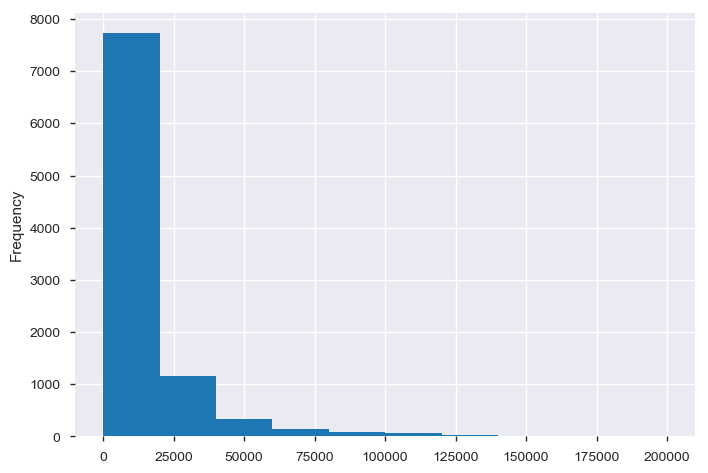

In [27]:
carsales_data[carsales_data['price']<200000]['price'].plot.hist()

This Histogram tells about car prices frequencies. Kept a filter of price less than 200000$ as set does not have much data beyond the 200000$, by having filter in place give good histogram plot and better under standing of the prices. By looking at the data most of the car pricess are below 250000$.

### 4.6 Year wise sales Analysis

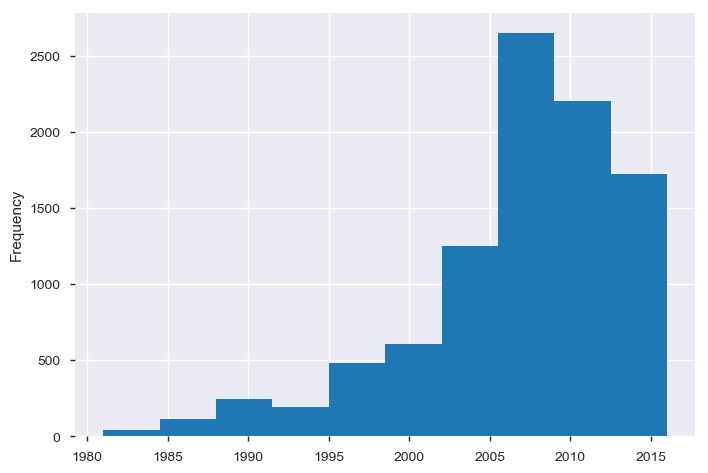

In [28]:
carsales_data[carsales_data['year']>1980]['year'].plot.hist()

This Histo graps tells about car sales frequencies. This tells about how car sales are increased from 1980 to recent times. Put filter on year to show from year 1980 to capture better insights. If observer the data sales are at peak during the 2005 to 2008 then it started decreasing.

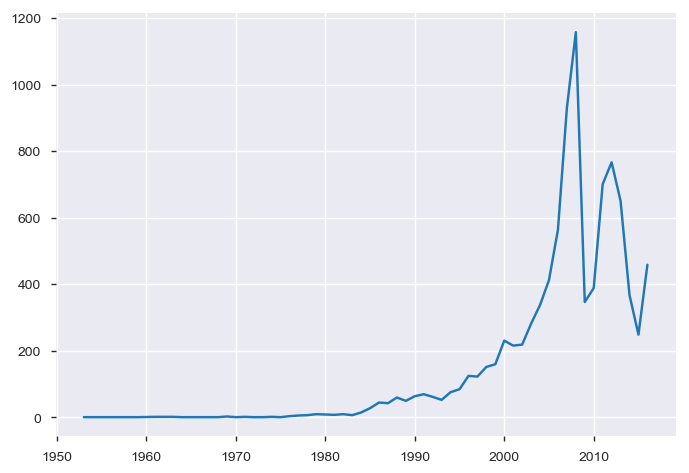

In [29]:
carsales_data['year'].value_counts().sort_index().plot.line()

This line plot tells about car sales frequencies. This tells about how car sales are increased from 1980 to recent times. If observer the data sales are at peak during the 2005 to 2008 (approximate number) then it started decreasing. Similar to Histogram shown in above. Sales increaed exponentially between 2005 and 2008.

In [30]:
carsales_data['year'].value_counts()

2008    1158
2007     930
2012     767
2011     701
2013     651
2006     564
2016     459
2005     413
2010     389
2014     368
2009     347
2004     338
2003     282
2015     249
2000     231
2002     219
2001     216
1999     160
1998     152
1996     125
1997     123
1995      85
1994      76
1991      70
1990      64
1992      62
1988      60
1993      53
1989      50
1986      45
1987      43
1985      28
1984      15
1979      10
1982      10
1980       9
1981       8
1978       7
1983       7
1977       6
1976       4
1969       3
1963       2
1974       2
1971       2
1962       2
1961       2
1953       1
1958       1
1970       1
1975       1
1959       1
1964       1
1972       1
1973       1
1968       1
Name: year, dtype: int64

This tells that maximum cars sales happened in the year 2008.

In [31]:
carsales_data.groupby('year')['price'].sum()

year
1953    1.100000e+04
1958    0.000000e+00
1959    2.593500e+02
1961    4.500000e+03
1962    1.610000e+04
1963    1.500000e+04
1964    1.500000e+03
1968    2.000000e+03
1969    3.734900e+04
1970    4.000000e+03
1971    3.350000e+03
1972    5.500000e+03
1973    0.000000e+00
1974    3.500000e+03
1975    7.500000e+02
1976    4.280000e+03
1977    1.330658e+04
1978    1.910000e+04
1979    2.610112e+04
1980    1.740375e+04
1981    2.210000e+04
1982    1.599675e+04
1983    1.140592e+04
1984    2.206822e+04
1985    6.079750e+04
1986    7.073318e+04
1987    9.436585e+04
1988    1.300050e+05
1989    1.144465e+05
1990    1.535558e+05
1991    1.917920e+05
1992    1.817730e+05
1993    2.067262e+05
1994    2.889218e+05
1995    3.593340e+05
1996    4.740562e+05
1997    5.949400e+05
1998    6.838078e+05
1999    7.328680e+05
2000    1.226133e+06
2001    1.238940e+06
2002    1.405243e+06
2003    2.083165e+06
2004    2.678909e+06
2005    3.636627e+06
2006    5.544459e+06
2007    9.860386e+06
2008    

This tells about year wise car sales and their price.

In [32]:
carsales_data.groupby(['car','mileage', 'body' ,'price'])['year'].count()

car           mileage  body       price    
Acura         4        sedan      38200.00     1
              30       crossover  46999.00     1
              32       crossover  30999.00     1
              82       crossover  17200.00     1
              85       crossover  18500.00     1
              126      sedan      12900.00     1
              144      sedan      8699.00      1
              145      sedan      8550.00      1
                                  8699.00      1
                                  8700.00      1
              150      sedan      15000.00     1
              170      crossover  15650.00     1
              199      crossover  11111.00     1
Alfa Romeo    60       hatch      15999.00     1
              62       sedan      15300.00     1
              91       sedan      12100.00     1
              94       sedan      2300.00      1
              122      sedan      2300.00      1
              150      sedan      12000.00     1
              156      se

<a id=section4></a>

<a id=section401></a>

<a id=section402></a>

D:\Personal\Softwares\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


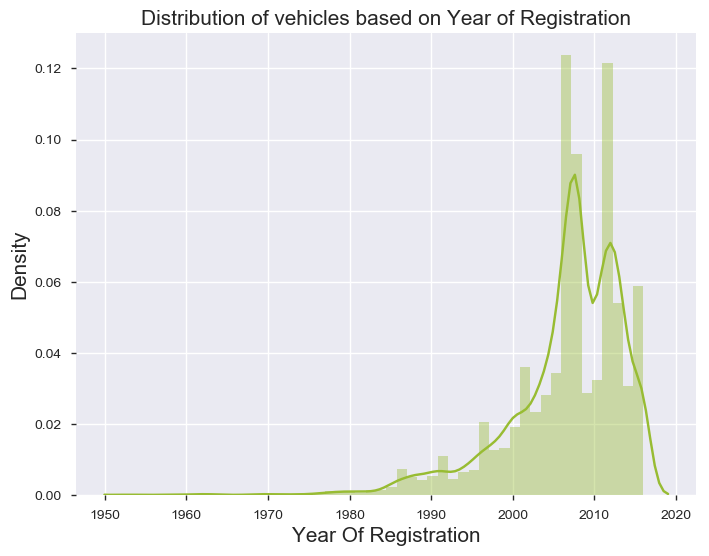

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(carsales_data["year"], color="#98bc33",kde=True, ax=ax)
ax.set_title('Distribution of vehicles based on Year of Registration', fontsize= 15)
plt.ylabel("Density", fontsize= 15)
plt.xlabel("Year Of Registration", fontsize= 15)
plt.show()

From the above distribution plot we can visulaize ditribution of cars based on year of resigration. There is a mismatch between cars that are sold vs cars that are registered.


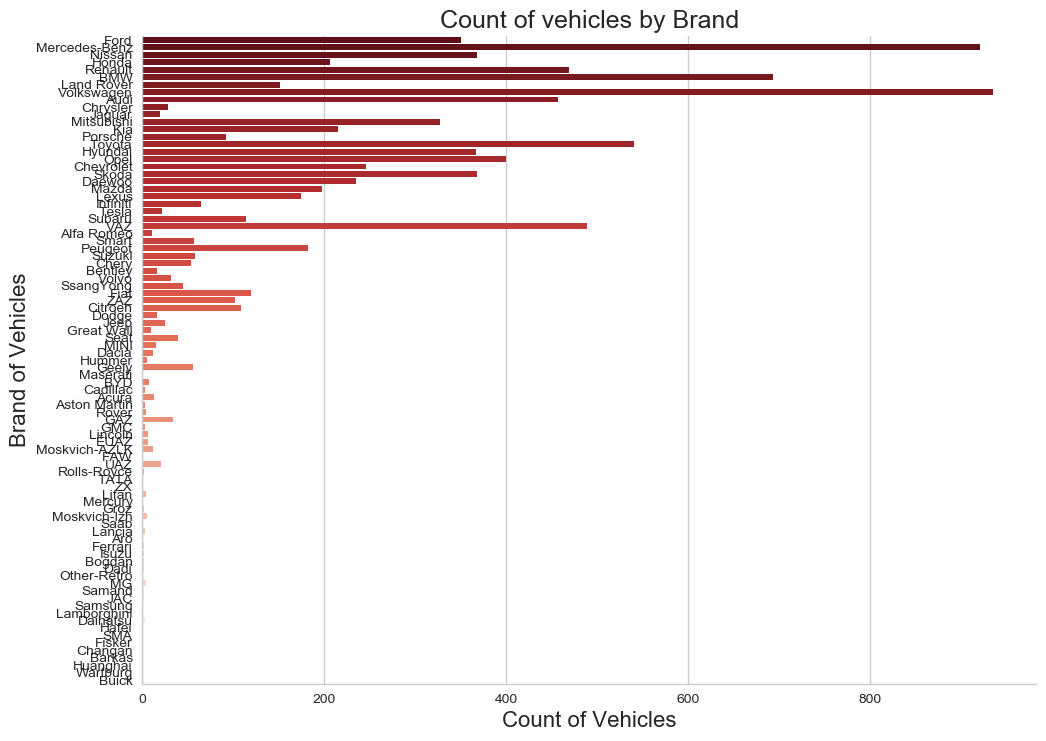

In [34]:
sns.set_style("whitegrid")
g = sns.factorplot(y="car", data=carsales_data, kind="count",
                   palette="Reds_r", size=7, aspect=1.5)
g.ax.set_title("Count of vehicles by Brand",fontdict={'size':18})
g.ax.xaxis.set_label_text("Count of Vehicles",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Brand of Vehicles",fontdict= {'size':16})
plt.show()

### 4.7 Engine Type and Mielage realationships

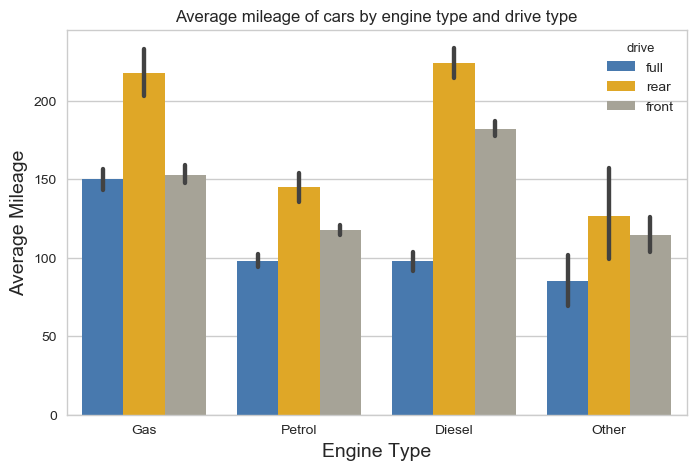

In [35]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(8,5))
sns.set_palette(sns.xkcd_palette(colors))
sns.barplot(x="engType", y="mileage",hue="drive",data=carsales_data)
ax.set_title("Average mileage of cars by engine type and drive type",fontdict= {'size':12})
ax.xaxis.set_label_text("Engine Type",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Mileage",fontdict= {'size':14})
plt.show()


This sub plot describes about average mileage of cars by enginetype and drive type.

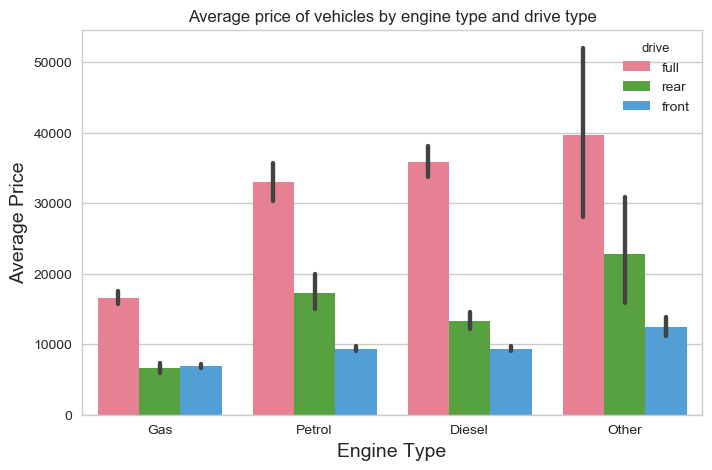

In [36]:
# barplot for price based on fuel type and gearbox type
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="engType", y="price",hue="drive", palette="husl",data=carsales_data)
ax.set_title("Average price of vehicles by engine type and drive type",fontdict= {'size':12})
ax.xaxis.set_label_text("Engine Type",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
plt.show()

Using __donut pie chart__ to see the relationship between __survival and gender__

<a id=section403></a>

### 4.8. Car Price varying factors

- Using mathematical function

In [37]:
trial = pd.DataFrame()
for b in list(carsales_data["car"].unique()):
    for e in list(carsales_data["body"].unique()):
        p = carsales_data[(carsales_data["car"] == b) & (carsales_data["body"] == e)]["price"].mean()
        trial = trial.append(pd.DataFrame({'car':b , 'body':e , 'avgPrice':p}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,car,body,avgPrice
0,Ford,crossover,22397
1,Ford,sedan,8630
2,Ford,other,15692
3,Ford,van,8547
4,Ford,vagon,6753


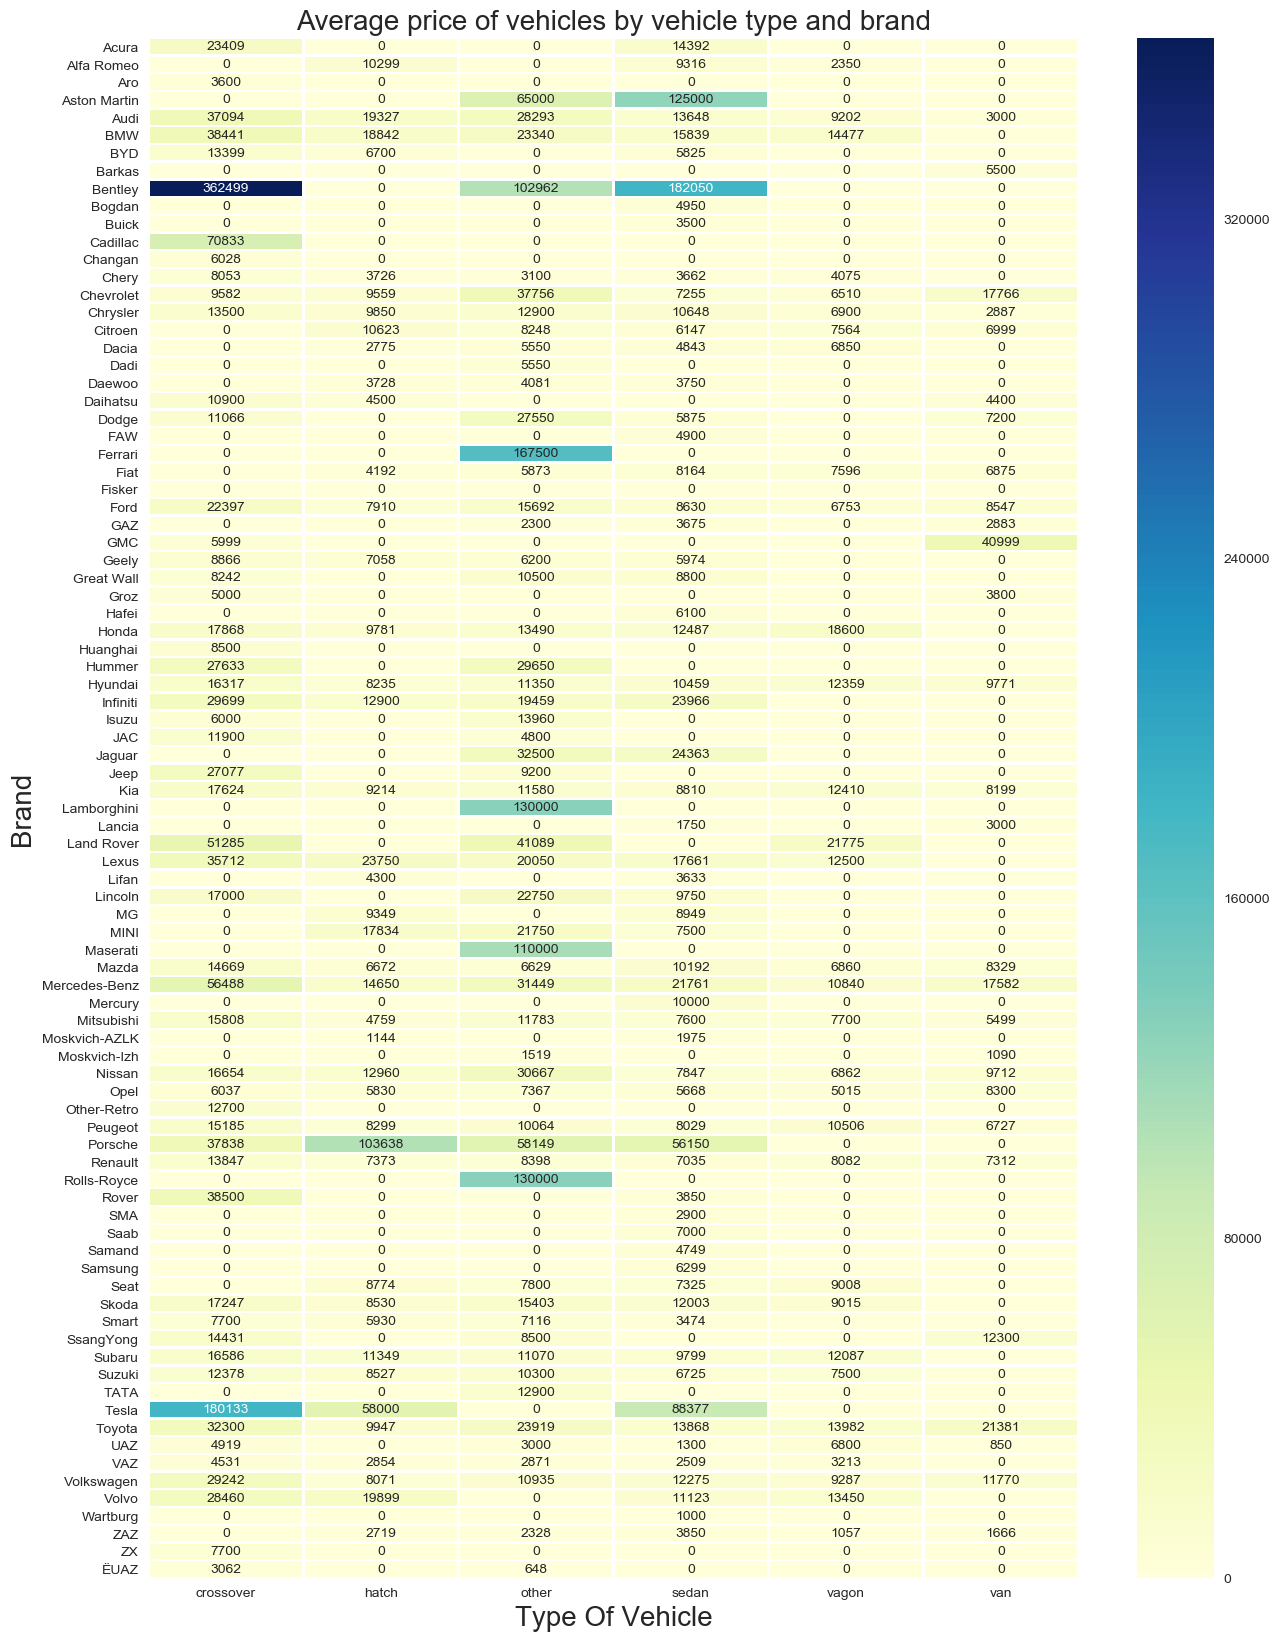

In [38]:
tri = trial.pivot("car","body", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Average price of vehicles by vehicle type and brand",fontdict={'size':20})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':20})
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})
plt.show()

You can see how the percentage of males, females and children survived are varying depending on the passenger class they are in. Also, its quiet difficult to develop quick insights by looking only at numbers. Therefore we will explore doing the same with the help of __plotting.__

- Using __violin plot__ to see the relationship between __Pclass and Survived__

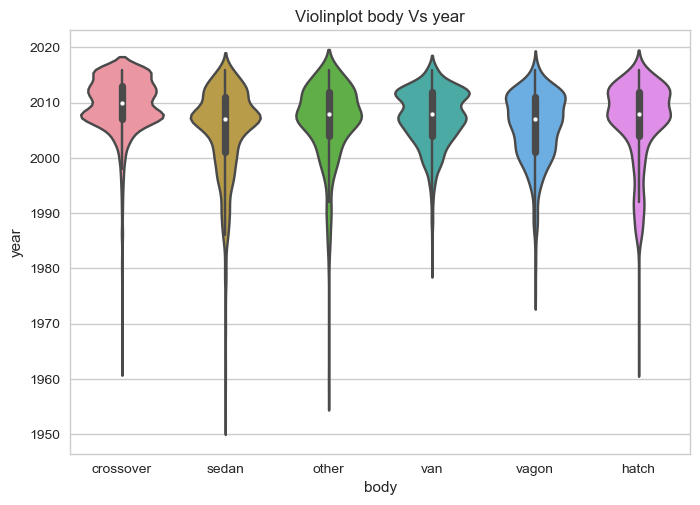

In [39]:
sns.violinplot('body','year', kind='point', data = carsales_data)
plt.title('Violinplot body Vs year')
plt.show()

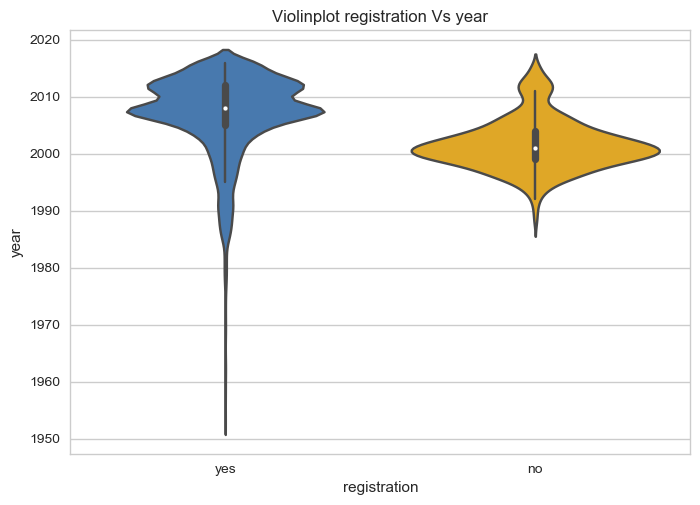

In [40]:
sns.violinplot('registration','year', kind='point', data = carsales_data)
plt.title('Violinplot registration Vs year')
plt.show()

Above is another beautiful way to see how the how many cars sold out are got reshitered.
- Between __2005__ to __2010__ cars sold out are resgistered in high numbers as sales are high.
- Most of the Cars sold in the year __2000__ are not registered. Non Registrated vechile numbers are dropped after that.

In [41]:
carsales_data.groupby(['registration'])['year'].count()

registration
no      561
yes    9015
Name: year, dtype: int64

In total 9015 are registered and 561 are not registered.

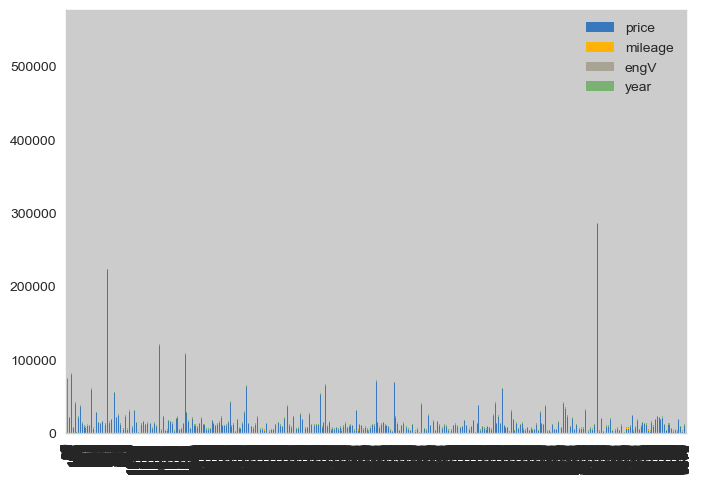

In [42]:
carsales_data.plot.bar(stacked=True)

1. __Pclass 3__ have _maximum_ number of __males__
2. __Pclass 1__ have _minimum_ number of __children__.

- using factorplot to see the variation of __surviavl rate with Pclass and GenderClass.__

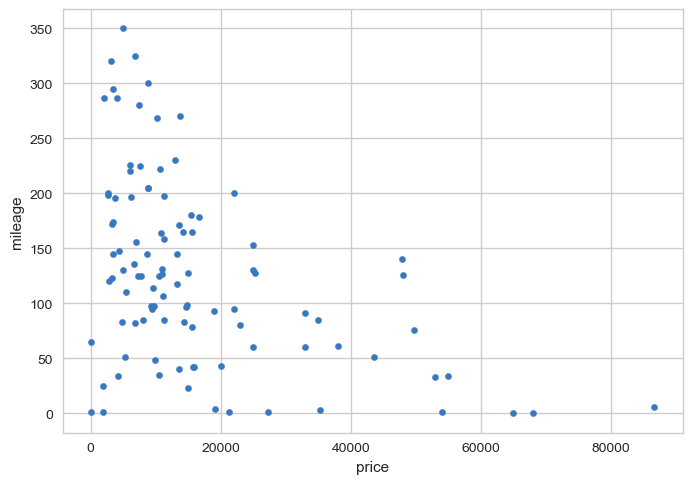

In [43]:
carsales_data[carsales_data['price']<100000].sample(100).plot.scatter(x='price',y='mileage')

Above scatter plot it study of 100 samples of car sales whose price is greater than 10000$    

    - This Graph Shows most of the cars sold are falling in backet whose mileage is beween 150 to 250. 
    - Whose price raging between 80000 - 200000. 

- Using Hexplot 

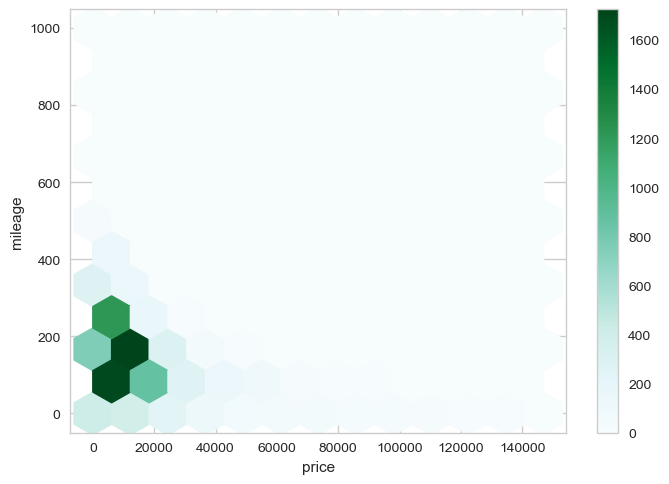

In [44]:
carsales_data[carsales_data['price']<150000].plot.hexbin(x='price', y='mileage', gridsize=12)

1. This Graph tell that mileage of car goes high when price of the car is also going high. 


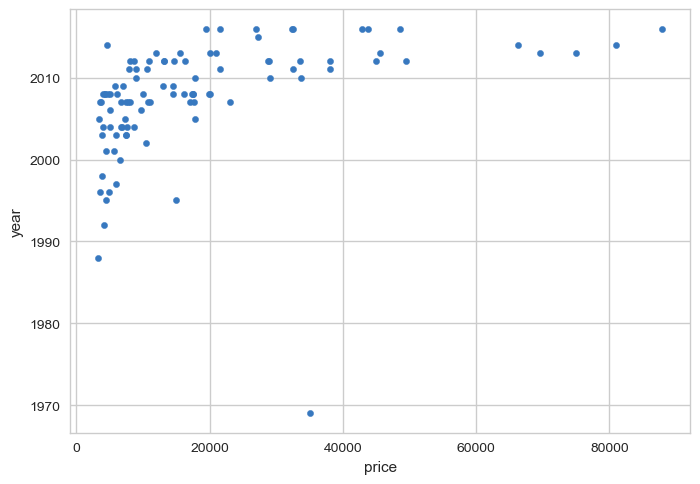

In [45]:
carsales_data[carsales_data['price']>3000].sample(100).plot.scatter(x='price',y='year')

__Scatter plot Year vs Price__   

Above scatter plot it study of 100 samples of car sales whose price is greater than 3000$. Scatter plot Yeab vs Price    

 The above graph shows:
     - Price of the cars increaed over the period of time. Most of the sales happened between 2005 and 2010.
     - We obser price of the cars is going high and sales are going down.


<a id=section404></a>

### 4.10 Establish coorelation between all the features using heatmap.

Text(0.5,1,'Correlation between features')

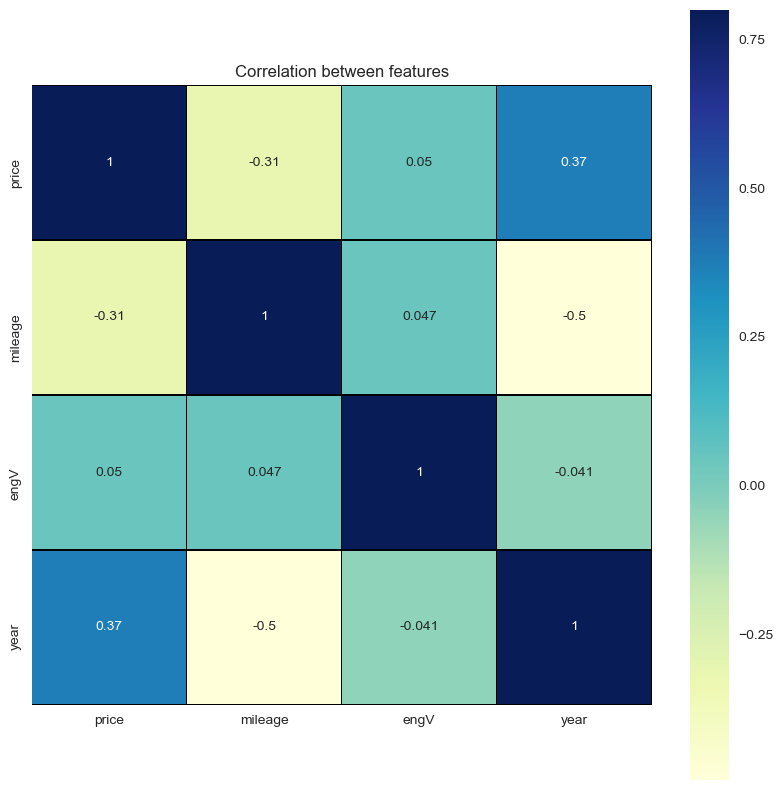

In [46]:
corr = carsales_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

Above graph dessribes the how diffrent numerical values are corellated. Mileage and year are more negetively corellated. Price and year are more postively correlated.

### 4.11 Hypothesis: Over the period car sales has increased

On studying Questionnaire we observed that an overwhelming percentage of increased in car sales.
- Car Sales got increased exponentially between 2005 to 2010.
- __36%__ of __sedan__ cars sold in over all sales.
- __43%+__ are of petrol type cars folwed by Diesel and Gas.
- __VolksWagen__ , __Mercedes-Benz__ and __BMW__ are most preferable Barnds.
- As car Milegae increaes price is getting increased.
- Most of the sold our car model is E-Class.
- After year 2010 car sales started goin down. We dont see stable carsales after that. 



## 5. Conclusion 

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the data. We also learnt how to _create new features_ which will in turn help us to better predict the survival. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
